In [16]:
#general functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

data = pd.read_csv("network_backup_dataset.csv")
X = data.iloc[:, [0, 1, 2, 3, 4]].values
X_SEnc = data.iloc[:, [0, 1, 2, 3, 4]].values
d=list(np.arange(1,33))
def getScalarEncoding(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    new_cat_features = enc.transform(cat_features)
    #print enc.classes_
    return new_cat_features # [1 2 0]
def getOHEncoding(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    new_cat_features = enc.transform(cat_features)
    print new_cat_features # [1 2 0]
    new_cat_features = new_cat_features.reshape(-1, 1) # Needs to be the correct shape
    ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
    ohe_features=ohe.fit_transform(new_cat_features)
    return  ohe_features
def rmsefun(actual,predicted):
    return np.sqrt(mean_squared_error(actual,predicted))
def plot_val(A,B,Alabel,Blabel,plttitle):
    plt.scatter(x=A, y=B,s=1)
    plt.plot([A.min(), A.max()], [A.min(), A.max()],  'k--', lw=5)
    plt.xlabel(Alabel)
    plt.ylabel(Blabel)
    plt.title(plttitle)
    plt.savefig('plots/'+plttitle+'.png', format='png')
    plt.show()

def plot_d(A,B1,B2,Alabel,B1label,B2label,plttitle):
    plt.scatter(x=A, y=B1,s=1)
    plt.scatter(x=A, y=B2,s=1)
    #plt.plot([A.min(), A.max()], [A.min(), A.max()],  'k--', lw=5)
    plt.xlabel(Alabel)
    plt.ylabel(B1label+' and '+B2label)
    plt.title(plttitle)
    plt.legend([B1label,B2label])
    plt.savefig('plots/'+plttitle+'.png', format='png')
    plt.show()
    
def plot_RMSE(A,B,Alabel,Blabel,plttitle):
    plt.close()
    plt.plot(x=A, y=B)
    plt.xlabel(Alabel)
    plt.ylabel(Blabel)
    plt.title(plttitle)
    plt.savefig('plots/'+plttitle+'.png', format='png')
    plt.show()
    
reg = linear_model.LinearRegression()

for i in range(0,5,1):
    X_SEnc[:,i]=getScalarEncoding(X[:, i])

    
    
#l is list for generating all possible combinations, and then will be used for fitting model on these combinations
from itertools import product
l=list(product([False,True], repeat=5))

kf = KFold(n_splits = 10, random_state=27)
y=data.iloc[:,5].values
reg = linear_model.LinearRegression()

for fold : 1
Train RMSE0.010311029813
Test RMSE0.0109252329088
for fold : 2
Train RMSE0.0104352787979
Test RMSE0.00980636682491
for fold : 3
Train RMSE0.0103095973993
Test RMSE0.0109367535727
for fold : 4
Train RMSE0.0104326818164
Test RMSE0.00982923462953
for fold : 5
Train RMSE0.0103028871725
Test RMSE0.0109967680537
for fold : 6
Train RMSE0.0104298376079
Test RMSE0.00985481449611
for fold : 7
Train RMSE0.0103054745922
Test RMSE0.0109738293297
for fold : 8
Train RMSE0.0104296649378
Test RMSE0.00985699172935
for fold : 9
Train RMSE0.010305053702
Test RMSE0.0109787927042
for fold : 10
Train RMSE0.010440859257
Test RMSE0.00975772275239
Average Train RMSE across 10 folds:0.101834358198
Average Test RMSE across 10 folds:0.101939446242
Predicted results :
[ 0.0263568   0.03874454  0.04057942 ...,  0.08704922  0.08517501
  0.0833008 ]
Residuals :
[-0.0263568  -0.03874454 -0.04057942 ...,  0.11152321  0.11439506
  0.11789972]


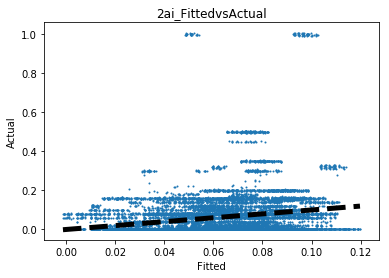

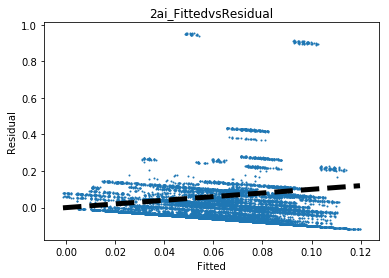

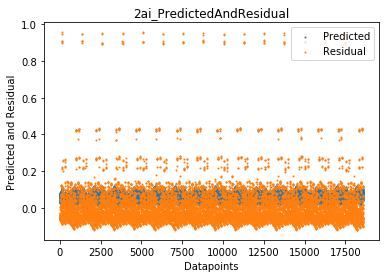

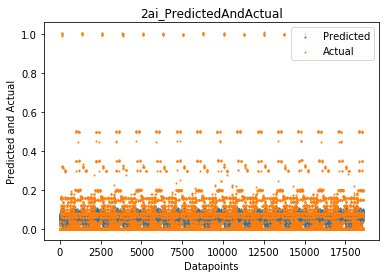

In [17]:
#Task 2.a.1 Basic linear Regression, on 10 FCV, plot Train RMSE and Test RMSE
reg = linear_model.LinearRegression()
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
count=1
datapoints=[]
res=[]
actual=[]
for train_index, test_index in kf.split(X_SEnc):
    datapoints.append(test_index)
    print "for fold : "+str(count)
    X_train, y_train = X_SEnc[train_index], y[train_index]
    X_test, y_test = X_SEnc[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    #train_curr=np.sqrt(np.mean((y_test - y_test_predicted) ** 2))
    #test_curr =np.sqrt(np.mean((y_train - y_train_predicted) ** 2))
    res.append(y_test - y_test_predicted)
    actual.append(y_test)
    print "Train RMSE" +str(train_curr)
    print "Test RMSE" +str(test_curr)
    rmse_train.append(train_curr)
    rmse_test.append(test_curr)
    count=count+1
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)

print "Average Train RMSE across 10 folds:"+ str(average_train_RMSE)
print "Average Test RMSE across 10 folds:"+ str(average_test_RMSE)

y_predicted=np.concatenate(y_predicted_fold, axis=0)
datapoints=np.concatenate(datapoints, axis=0)
y_residual=np.concatenate(res, axis=0)
actual=np.concatenate(actual, axis=0)
print "Predicted results :"
print y_predicted
y_residual = y - y_predicted
print "Residuals :"
print y_residual


plot_val(y_predicted,actual,'Fitted','Actual','2ai_FittedvsActual')
plot_val( y_predicted,y_residual, 'Fitted','Residual','2ai_FittedvsResidual')
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2ai_PredictedAndResidual')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2ai_PredictedAndActual')



In [20]:
from statsmodels.stats import stattools
stat=stattools.durbin_watson(y_residual)
print stat

0.427174046785


In [13]:
print max(actual)
print max(y_predicted)
print max(y_residual)

1.00882658176
0.119759504804
0.956791200105


for fold : 1
Train RMSE0.010311029813
Test RMSE0.0109252329088
for fold : 2
Train RMSE0.0104352787979
Test RMSE0.00980636682491
for fold : 3
Train RMSE0.0103095973993
Test RMSE0.0109367535727
for fold : 4
Train RMSE0.0104326818164
Test RMSE0.00982923462953
for fold : 5
Train RMSE0.0103028871725
Test RMSE0.0109967680537
for fold : 6
Train RMSE0.0104298376079
Test RMSE0.00985481449611
for fold : 7
Train RMSE0.0103054745922
Test RMSE0.0109738293297
for fold : 8
Train RMSE0.0104296649378
Test RMSE0.00985699172935
for fold : 9
Train RMSE0.010305053702
Test RMSE0.0109787927042
for fold : 10
Train RMSE0.010440859257
Test RMSE0.00975772275239
Average Train RMSE across 10 folds:0.101834358198
Average Test RMSE across 10 folds:0.101939446242
Predicted results :
[ 0.0263568   0.03874454  0.04057942 ...,  0.08704922  0.08517501
  0.0833008 ]
Residuals :
[-0.0263568  -0.03874454 -0.04057942 ...,  0.11152321  0.11439506
  0.11789972]


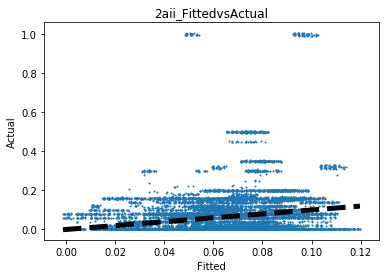

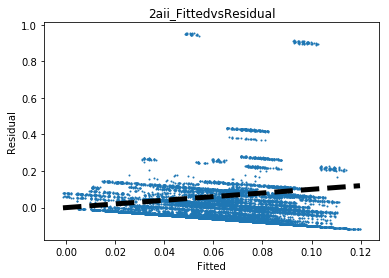

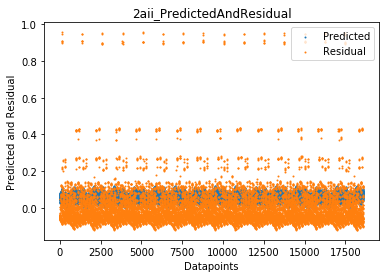

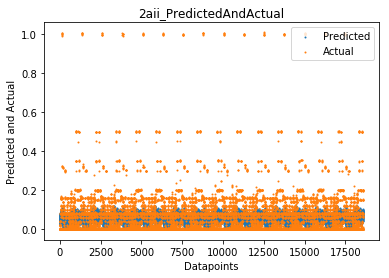

In [22]:
# 2.a.ii Standardize
#X_Scalar = data.iloc[:, [0, 1, 2, 3, 4]].values

#Standardize features by removing the mean and scaling to unit variance
from sklearn import preprocessing #import StandardScaler
x_std=preprocessing.StandardScaler(with_mean=False).fit_transform(X_SEnc)
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
datapoints=[]
res=[]
actual=[]
count=1
for train_index, test_index in kf.split(x_std):
    print "for fold : "+str(count)
    datapoints.append(test_index)
    X_train, y_train = x_std[train_index], y[train_index]
    X_test, y_test = x_std[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    print "Train RMSE" +str(train_curr)
    print "Test RMSE" +str(test_curr)
    rmse_train.append(train_curr)
    rmse_test.append(test_curr)
    actual.append(y_test)
    res.append(y_test-y_test_predicted)
    count=count+1
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)

print "Average Train RMSE across 10 folds:"+ str(average_train_RMSE)
print "Average Test RMSE across 10 folds:"+ str(average_test_RMSE)

y_predicted=np.concatenate(y_predicted_fold, axis=0)
datapoints=np.concatenate(datapoints, axis=0)
y_residual=np.concatenate(res, axis=0)
actual=np.concatenate(actual, axis=0)
print "Predicted results :"
print y_predicted
print "Residuals :"
print y_residual

plot_val(y_predicted,actual,'Fitted','Actual','2aii_FittedvsActual')
plot_val( y_predicted,y_residual, 'Fitted','Residual','2aii_FittedvsResidual')
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2aii_PredictedAndResidual')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2aii_PredictedAndActual')

In [23]:
#Task 2 a iii, applying f regression, find 3 most important features

from sklearn import feature_selection
model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=3)
results=model.fit(x_std,y)
print results.scores_


[  8.45006257e-03   2.20612122e+02   1.50740934e+02   2.61386654e+01
   4.60786474e+02]


In [24]:
print sorted(results.scores_)

[0.008450062567778558, 26.138665427592517, 150.74093436955826, 220.61212209783977, 460.7864739779813]


In [25]:

"""
As per the output of f_regression, the three features are feature 5, 2, 3
i.e. FileName , Day Of the Week, Backup Start Time-Hour of the day
"""

'\nAs per the output of f_regression, the three features are feature 5, 2, 3\ni.e. FileName , Day Of the Week, Backup Start Time-Hour of the day\n'

In [26]:
#Task 2 a iii, we now apply mutual_info_regression to get the 3 best features
mi_model = feature_selection.SelectKBest(score_func=feature_selection.mutual_info_regression,k=3)
mi_results=mi_model.fit(x_std,y)
print mi_results.scores_
print "Sorted results"
print sorted(mi_results.scores_)

[ 0.          0.23668325  0.30299071  0.76919279  0.76385795]
Sorted results
[0.0, 0.23668325288892156, 0.30299071031097791, 0.76385795268702683, 0.76919279391201467]


In [27]:
"""According to the output obtained by mutial info regression, the 3 best features are : 5,4,3
i.e. Work-Flow-ID, FileName,Backup Start Time-Hour of the day"""

'According to the output obtained by mutial info regression, the 3 best features are : 5,4,3\ni.e. Work-Flow-ID, FileName,Backup Start Time-Hour of the day'

kf fold starts
Train RMSE : 0.0103237999341
Test RMSE : 0.0108687471998
kf fold starts
Train RMSE : 0.0104383362754
Test RMSE : 0.0098383856177
kf fold starts
Train RMSE : 0.0103217776132
Test RMSE : 0.0108874673577
kf fold starts
Train RMSE : 0.0104356954913
Test RMSE : 0.00986232639668
kf fold starts
Train RMSE : 0.0103150833279
Test RMSE : 0.0109474527824
kf fold starts
Train RMSE : 0.0104327191974
Test RMSE : 0.00988871044563
kf fold starts
Train RMSE : 0.0103175302443
Test RMSE : 0.0109259824843
kf fold starts
Train RMSE : 0.010432553286
Test RMSE : 0.0098904474846
kf fold starts
Train RMSE : 0.0103174295106
Test RMSE : 0.0109266110416
kf fold starts
Train RMSE : 0.0104440676045
Test RMSE : 0.00978657336979
Average Train RMSE across 10 folds:0.101871974794
Average Test RMSE across 10 folds:0.101893426765
Predicted results :
[ 0.03148296  0.03895785  0.04082658 ...,  0.08376495  0.08187429
  0.07998363]
Residuals :
[-0.03148296 -0.03895785 -0.04082658 ...,  0.11480748  0.11769578
 

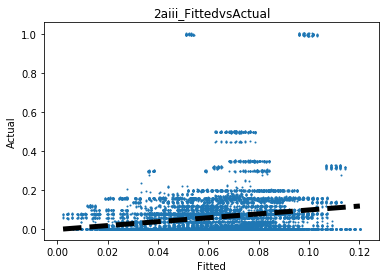

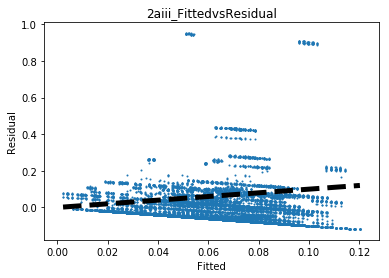

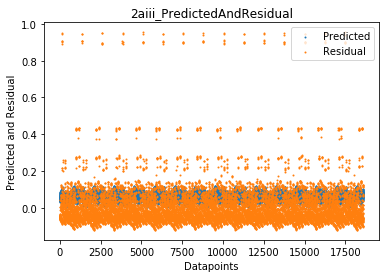

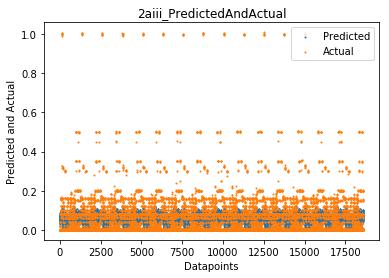

In [28]:
# Now training the model as per top three features from f_regression

idx_IN_columns = [4,1,2 ]
x_std_trim_fr = x_std[:,idx_IN_columns]

count=1
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
actual=[]
res=[]
datapoints=[]
for train_index, test_index in kf.split(x_std_trim_fr):
    print "kf fold starts"
    X_train, y_train = x_std_trim_fr[train_index], y[train_index]
    X_test, y_test = x_std_trim_fr[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    print "Train RMSE : " +str(train_curr)
    print "Test RMSE : " +str(test_curr)
    rmse_train.append(train_curr)
    rmse_test.append(test_curr)
    datapoints.append(test_index)
    actual.append(y_test)
    res.append(y_test-y_test_predicted)
    count=count+1
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)

print "Average Train RMSE across 10 folds:"+ str(average_train_RMSE)
print "Average Test RMSE across 10 folds:"+ str(average_test_RMSE)

y_predicted=np.concatenate(y_predicted_fold, axis=0)
datapoints=np.concatenate(datapoints, axis=0)
y_residual=np.concatenate(res, axis=0)
actual=np.concatenate(actual, axis=0)
print "Predicted results :"
print y_predicted
y_residual = y - y_predicted
print "Residuals :"
print y_residual

plot_val(y_predicted,actual,'Fitted','Actual','2aiii_FittedvsActual')
plot_val( y_predicted,y_residual, 'Fitted','Residual','2aiii_FittedvsResidual')
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2aiii_PredictedAndResidual')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2aiii_PredictedAndActual')


kf fold starts
Train RMSE : 0.0104316047988
Test RMSE : 0.0111253853677
kf fold starts
Train RMSE : 0.010574052367
Test RMSE : 0.00984173078714
kf fold starts
Train RMSE : 0.0104277223729
Test RMSE : 0.0111582427895
kf fold starts
Train RMSE : 0.01057148159
Test RMSE : 0.00986481294332
kf fold starts
Train RMSE : 0.0104222579546
Test RMSE : 0.0112076973813
kf fold starts
Train RMSE : 0.010568340468
Test RMSE : 0.0098937558441
kf fold starts
Train RMSE : 0.0104229477189
Test RMSE : 0.0112011072695
kf fold starts
Train RMSE : 0.0105689923341
Test RMSE : 0.00988797218731
kf fold starts
Train RMSE : 0.0104243084649
Test RMSE : 0.0111900527765
kf fold starts
Train RMSE : 0.0105799002715
Test RMSE : 0.00978870289459
Average Train RMSE across 10 folds:0.102547286771
Average Test RMSE across 10 folds:0.102465412867
Predicted results :
[ 0.01633276  0.02863316  0.03047253 ...,  0.08569239  0.08381445
  0.0819365 ]
Residuals :
[-0.01633276 -0.02863316 -0.03047253 ...,  0.11288004  0.11575563
  0

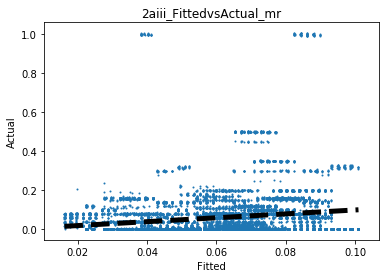

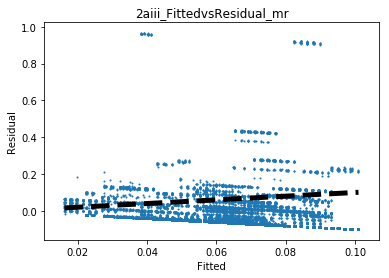

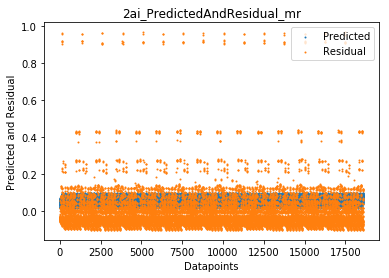

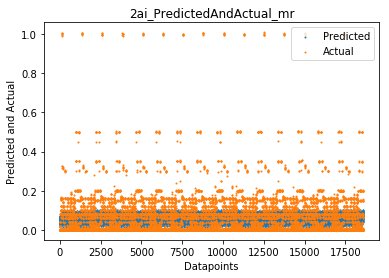

In [29]:
# Now training the model as per top three features from mutual_info_regression
#best features 4,5,3
idx_IN_columns = [4,3,2 ]
x_std_trim_fr = x_std[:,idx_IN_columns]

count=1
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
actual=[]
res=[]
datapoints=[]

for train_index, test_index in kf.split(x_std_trim_fr):
    print "kf fold starts"
    X_train, y_train = x_std_trim_fr[train_index], y[train_index]
    X_test, y_test = x_std_trim_fr[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    print "Train RMSE : " +str(train_curr)
    print "Test RMSE : " +str(test_curr)
    rmse_test.append(train_curr)
    rmse_train.append(test_curr)
    datapoints.append(test_index)
    actual.append(y_test)
    res.append(y_test-y_test_predicted)
    count=count+1
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)

print "Average Train RMSE across 10 folds:"+ str(average_train_RMSE)
print "Average Test RMSE across 10 folds:"+ str(average_test_RMSE)

y_predicted=np.concatenate(y_predicted_fold, axis=0)
datapoints=np.concatenate(datapoints, axis=0)
y_residual=np.concatenate(res, axis=0)
actual=np.concatenate(actual, axis=0)

print "Predicted results :"
print y_predicted
print "Residuals :"
print y_residual

plot_val(y_predicted,actual,'Fitted','Actual','2aiii_FittedvsActual_mr')
plot_val( y_predicted,y_residual, 'Fitted','Residual','2aiii_FittedvsResidual_mr')
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2ai_PredictedAndResidual_mr')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2ai_PredictedAndActual_mr')


In [30]:
#Task 2aiv generating all possible combinations, and then fitting the model for these combinations

from itertools import product
l=list(product([False,True], repeat=5))
l

[(False, False, False, False, False),
 (False, False, False, False, True),
 (False, False, False, True, False),
 (False, False, False, True, True),
 (False, False, True, False, False),
 (False, False, True, False, True),
 (False, False, True, True, False),
 (False, False, True, True, True),
 (False, True, False, False, False),
 (False, True, False, False, True),
 (False, True, False, True, False),
 (False, True, False, True, True),
 (False, True, True, False, False),
 (False, True, True, False, True),
 (False, True, True, True, False),
 (False, True, True, True, True),
 (True, False, False, False, False),
 (True, False, False, False, True),
 (True, False, False, True, False),
 (True, False, False, True, True),
 (True, False, True, False, False),
 (True, False, True, False, True),
 (True, False, True, True, False),
 (True, False, True, True, True),
 (True, True, False, False, False),
 (True, True, False, False, True),
 (True, True, False, True, False),
 (True, True, False, True, True),


kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101834358198
 Test RMSE : 0.101939446242
Predicted output 
[ 0.0263568   0.03874454  0.04057942 ...,  0.08704922  0.08517501
  0.0833008 ]
Residuals : 
[-0.0263568  -0.03874454 -0.04057942 ...,  0.11152321  0.11439506
  0.11789972]


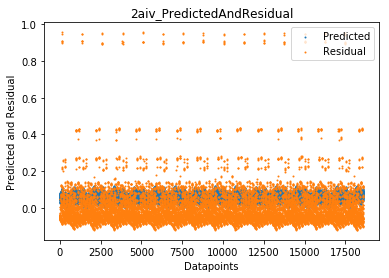

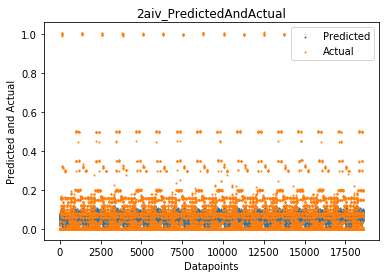

In [31]:
#For combination 1
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
rmse_train_com=[]
rmse_test_com=[]
count=1
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
actual=[]
res=[]
datapoints=[]
ohenc = OneHotEncoder(categorical_features=(False, False, False, False, False))
ohenc.fit(X_SEnc)
xoh=ohenc.transform(X_SEnc)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh[train_index], y[train_index]
    X_test, y_test = xoh[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    rmse_test.append(test_curr)
    rmse_train.append(train_curr)
    datapoints.append(test_index)
    actual.append(y_test)
    res.append(y_test-y_test_predicted)
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
rmse_train_com.append(average_train_RMSE)
rmse_test_com.append(average_test_RMSE)
y_predicted=np.concatenate(y_predicted_fold, axis=0)
datapoints=np.concatenate(datapoints, axis=0)
y_residual=np.concatenate(res, axis=0)
actual=np.concatenate(actual, axis=0)
print "Predicted output "
print y_predicted
y_residual=y-y_predicted
print "Residuals : "
print y_residual
count=count+1
    
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2aiv_PredictedAndResidual')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2aiv_PredictedAndActual')

In [32]:
# Task 2 a iv continued

for i in l[1:]:
    print i
    rmse_train=[]
    rmse_test=[]
    y_predicted_fold=[]
    actual=[]
    res=[]
    datapoints=[]

    ohenc = OneHotEncoder(categorical_features=i)
    ohenc.fit(X_SEnc)
    xoh=ohenc.transform(X_SEnc)
    for train_index, test_index in kf.split(xoh):
        print "kf fold starts"
        
        X_train, y_train = xoh.toarray()[train_index], y[train_index]
        X_test, y_test = xoh.toarray()[test_index], y[test_index]
        reg.fit(X_train, y_train)
        y_test_predicted = reg.predict(X_test)
        y_predicted_fold.append(y_test_predicted)
        y_train_predicted=reg.predict(X_train)
        train_curr=mean_squared_error(y_train,y_train_predicted)
        test_curr=mean_squared_error(y_test,y_test_predicted)
        rmse_test.append(test_curr)
        rmse_train.append(train_curr)
        datapoints.append(test_index)
        actual.append(y_test)
        res.append(y_test-y_test_predicted)
    average_train_RMSE=np.sqrt(sum(rmse_train)/10)
    average_test_RMSE=np.sqrt(sum(rmse_test)/10)
    print " Train RMSE : "+ str(average_train_RMSE)
    print " Test RMSE : "+ str(average_test_RMSE)
    rmse_train_com.append(average_train_RMSE)
    rmse_test_com.append(average_test_RMSE)
    y_predicted=np.concatenate(y_predicted_fold, axis=0)
    datapoints=np.concatenate(datapoints, axis=0)
    y_residual=np.concatenate(res, axis=0)
    actual=np.concatenate(actual, axis=0)
    print "Predicted output "
    print y_predicted
    y_residual=y-y_predicted
    print "Residuals : "
    print y_residual
    count=count+1
    
    
print "######################################"
print rmse_train_com
print rmse_test_com

d=range(1,33)


(False, False, False, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907937477572
 Test RMSE : 0.0909696249481
Predicted output 
[ 0.09493256  0.01715088  0.01747131 ...,  0.14829063  0.14816284
  0.14750481]
Residuals : 
[-0.09493256 -0.01715088 -0.01747131 ...,  0.0502818   0.05140723
  0.05369571]
(False, False, False, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907966290207
 Test RMSE : 0.0909589818879
Predicted output 
[ 0.09527622  0.01808844  0.01809649 ...,  0.14775085  0.14778137
  0.14779663]
Residuals : 
[-0.09527622 -0.01808844 -0.01809649 ...,  0.05082158  0.0517887
  0.05340389]
(False, False, False, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold

kf fold starts
 Train RMSE : 0.100579458588
 Test RMSE : 7001681485.65
Predicted output 
[  9.01337051e+09   9.01337051e+09   9.01337051e+09 ...,  -8.96533977e+09
  -8.96533977e+09  -8.96533977e+09]
Residuals : 
[ -9.01337051e+09  -9.01337051e+09  -9.01337051e+09 ...,   8.96533977e+09
   8.96533977e+09   8.96533977e+09]
(True, False, True, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893782446416
 Test RMSE : 36800500816.9
Predicted output 
[ -1.45441203e+10  -1.45441203e+10  -1.45441203e+10 ...,  -1.14896669e+11
  -1.14896669e+11  -1.14896669e+11]
Residuals : 
[  1.45441203e+10   1.45441203e+10   1.45441203e+10 ...,   1.14896669e+11
   1.14896669e+11   1.14896669e+11]
(True, False, True, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Tra

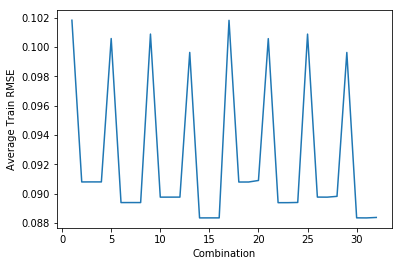

In [33]:
plt.plot(d, rmse_train_com)
plt.xlabel('Combination')
plt.ylabel('Average Train RMSE')
plt.savefig('plots/2aiv_AverageTrainRMSE.png')
plt.show()

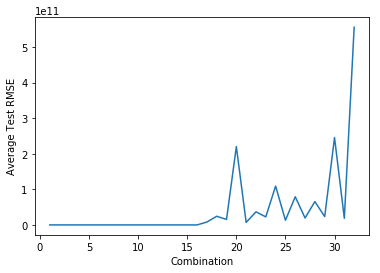

In [34]:
plt.plot(d, rmse_test_com)
plt.xlabel('Combination')
plt.ylabel('Average Test RMSE')
plt.savefig('plots/2aiv_AverageTestRMSE.png')
plt.show()

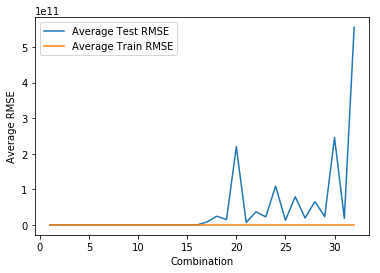

In [36]:
plt.plot(d, rmse_test_com)
plt.plot(d, rmse_train_com)
plt.xlabel('Combination')
plt.ylabel('Average RMSE')
plt.legend(['Average Test RMSE','Average Train RMSE'])
plt.savefig('plots/2aiv_AverageTrainTestRMSE.png')
plt.show()

kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883401020714
 Test RMSE : 0.0885082394803
Predicted output 
[ 0.11806679  0.04078102  0.04083443 ...,  0.13694763  0.13681793
  0.13614464]
Residuals : 
[-0.11806679 -0.04078102 -0.04083443 ...,  0.0616248   0.06275214
  0.06505588]


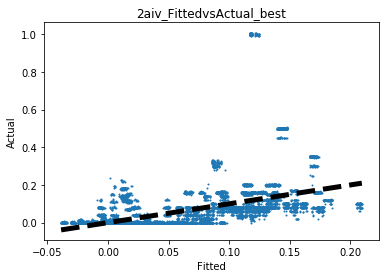

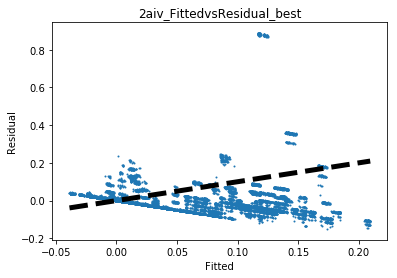

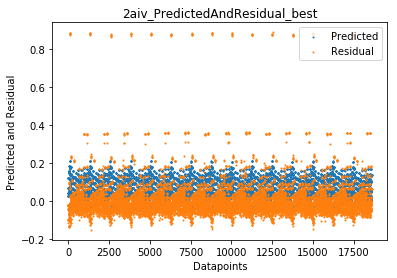

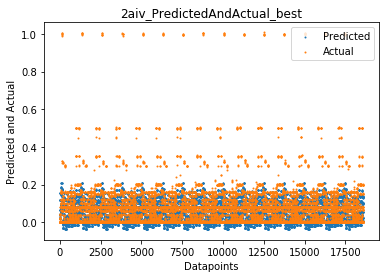

In [37]:
# Plotting for best combination
#For combination 1
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
count=1
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
actual=[]
res=[]
datapoints=[]
ohenc = OneHotEncoder(categorical_features=(False, True, True, True, True))
ohenc.fit(X_SEnc)
xoh=ohenc.transform(X_SEnc)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh.toarray()[train_index], y[train_index]
    X_test, y_test = xoh.toarray()[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    rmse_test.append(test_curr)
    rmse_train.append(train_curr)
    datapoints.append(test_index)
    actual.append(y_test)
    res.append(y_test-y_test_predicted)
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted=np.concatenate(y_predicted_fold, axis=0)
datapoints=np.concatenate(datapoints, axis=0)
y_residual=np.concatenate(res, axis=0)
actual=np.concatenate(actual, axis=0)
print "Predicted output "
print y_predicted
y_residual=y-y_predicted
print "Residuals : "
print y_residual
count=count+1
plot_val(y_predicted,actual,'Fitted','Actual','2aiv_FittedvsActual_best')
plot_val( y_predicted,y_residual, 'Fitted','Residual','2aiv_FittedvsResidual_best')   
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2aiv_PredictedAndResidual_best')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2aiv_PredictedAndActual_best')

In [41]:
#These are coefficients of the best model
print np.asarray(reg.coef_)
print reg.intercept_
len(reg.coef_)

[ -1.87682002e+09  -1.87682002e+09  -1.87682002e+09  -1.87682002e+09
  -1.87682002e+09  -1.87682002e+09  -1.87682002e+09  -3.04215178e+10
  -3.04215178e+10  -3.04215178e+10  -3.04215178e+10  -3.04215178e+10
  -3.04215178e+10   2.93255890e+10   1.96092199e+10   1.83636687e+10
   2.62551020e+10   3.26281987e+10  -2.50695779e+09  -2.50695779e+09
   7.20941128e+09   7.20941128e+09   8.45496243e+09   8.45496243e+09
   8.45496243e+09   8.45496243e+09   8.45496243e+09   8.45496243e+09
   5.63529187e+08   5.63529187e+08  -2.50695779e+09   5.63529187e+08
   5.63529187e+08   5.63529187e+08   5.63529187e+08  -5.80956757e+09
  -5.80956757e+09  -5.80956757e+09  -5.80956757e+09  -5.80956757e+09
  -5.80956757e+09  -2.50695779e+09  -2.50695779e+09  -2.50695779e+09
   7.20941128e+09   7.20941128e+09   7.20941128e+09   7.20941128e+09
   1.62124634e-05]
5479706680.9


49

In [45]:
#Task 2 a v, with Ridge Regularization
#Here we first find the best value of alpha by doing RidgeCV, and then apply Ridge function to get the TestRMSE for the same
#By using Regularization,  we will control ill-conditioning and over-fitting
#This is done by applying Ridge,LAsso,Elastic Net regularizations and analyzing again

#First doing for all scalar
from sklearn import linear_model
ridge_reg = linear_model.RidgeCV( cv=10)
rmse_train=[]
rmse_test=[]
actual=[]
res=[]
datapoints=[]
y_predicted_fold=[]
rmse_train_com=[]
rmse_test_com=[]
alphalist=[]
ohenc = OneHotEncoder(categorical_features=(False, False, False, False, False))
ohenc.fit(X_SEnc)
xoh=ohenc.transform(X_SEnc)

ridge_reg.fit(xoh, y, sample_weight=None)
print "best alpha for comination is :"
print ridge_reg.alpha_
alphalist.append(ridge_reg.alpha_)
#ridge_reg.cv_values_
#best alpha for ridge=0.1
ridge_reg_2 = linear_model.Ridge()
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"
    datapoints.append(test_index)
    X_train, y_train = xoh[train_index], y[train_index]
    X_test, y_test = xoh[test_index], y[test_index]
    actual.append(y_test)
    ridge_reg_2.fit(X_train, y_train)
    y_test_predicted = ridge_reg_2.predict(X_test)
    print max(y_test_predicted)
    
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=ridge_reg_2.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    rmse_test.append(test_curr)
    rmse_train.append(train_curr)
    
    res.append(y_test-y_test_predicted)
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)

actual=np.concatenate(actual, axis=0)
rmse_train_com.append(average_train_RMSE)
rmse_test_com.append(average_test_RMSE)



best alpha for comination is :
10.0
kf fold starts
0.114373866967
kf fold starts
0.11912712553
kf fold starts
0.114792829327
kf fold starts
0.118821674845
kf fold starts
0.114947764225
kf fold starts
0.118749498047
kf fold starts
0.114915082954
kf fold starts
0.118954283692
kf fold starts
0.114696008234
kf fold starts
0.119758953012
 Train RMSE : 0.101834358198
 Test RMSE : 0.101939443385


In [46]:
#Now applying Ridge for remaining 31 combinations
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
ridge_reg = linear_model.RidgeCV( cv=10)

count=2
for i in l[1:]:
    print i
    rmse_train=[]
    rmse_test=[]
    y_predicted_fold=[]
    actual=[]
    res=[]
    datapoints=[]
    ohenc = OneHotEncoder(categorical_features=i)
    ohenc.fit(X_SEnc)
    xoh=ohenc.transform(X_SEnc)
    ridge_reg.fit(xoh, y, sample_weight=None)
    print "best alpha for comination is :"
    print ridge_reg.alpha_
    alphalist.append(ridge_reg.alpha_)
    ridge_reg_2 = linear_model.Ridge(alpha=ridge_reg.alpha_)
    for train_index, test_index in kf.split(xoh):
        print "kf fold starts"
        X_train, y_train = xoh.toarray()[train_index], y[train_index]
        X_test, y_test = xoh.toarray()[test_index], y[test_index]
        ridge_reg_2.fit(X_train, y_train)
        y_test_predicted = ridge_reg_2.predict(X_test)
        y_predicted_fold.append(y_test_predicted)
        y_train_predicted=ridge_reg_2.predict(X_train)
        train_curr=mean_squared_error(y_train,y_train_predicted)
        test_curr=mean_squared_error(y_test,y_test_predicted)
        rmse_test.append(test_curr)
        rmse_train.append(train_curr)
        datapoints.append(test_index)
        actual.append(y_test)
        res.append(y_test-y_test_predicted)
    average_train_RMSE=np.sqrt(sum(rmse_train)/10)
    average_test_RMSE=np.sqrt(sum(rmse_test)/10)
    print " Train RMSE : "+ str(average_train_RMSE)
    print " Test RMSE : "+ str(average_test_RMSE)
    rmse_train_com.append(average_train_RMSE)
    rmse_test_com.append(average_test_RMSE)
    y_predicted=np.concatenate(y_predicted_fold, axis=0)
    datapoints=np.concatenate(datapoints, axis=0)
    y_residual=np.concatenate(res, axis=0)
    actual=np.concatenate(actual, axis=0)
    print "Predicted output "
    print y_predicted
    y_residual=y-y_predicted
    print "Residuals : "
    print y_residual
    count=count+1
    
    
print "######################################"
print alphalist
print rmse_train_com
print rmse_test_com

(False, False, False, False, True)
best alpha for comination is :
1.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907936345536
 Test RMSE : 0.0909682311936
Predicted output 
[ 0.09448864  0.0172504   0.01762504 ...,  0.14814674  0.14801536
  0.14734814]
Residuals : 
[-0.09448864 -0.0172504  -0.01762504 ...,  0.05042569  0.05155471
  0.05385238]
(False, False, False, True, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907950085185
 Test RMSE : 0.0909667874792
Predicted output 
[ 0.0950539   0.01818775  0.01820364 ...,  0.14733035  0.14731739
  0.14730443]
Residuals : 
[-0.0950539  -0.01818775 -0.01820364 ...,  0.05124208  0.05225268
  0.05389609]
(False, False, False, True, True)
best alpha for comination

best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.090786994964
 Test RMSE : 0.0911455521304
Predicted output 
[ 0.09492518  0.01772152  0.01810504 ...,  0.14735885  0.14722951
  0.1465727 ]
Residuals : 
[-0.09492518 -0.01772152 -0.01810504 ...,  0.05121359  0.05234056
  0.05462782]
(True, False, True, False, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100579975989
 Test RMSE : 0.10093024871
Predicted output 
[ 0.02016506  0.032748    0.03457724 ...,  0.07537884  0.0735124
  0.07164595]
Residuals : 
[-0.02016506 -0.032748   -0.03457724 ...,  0.1231936   0.12605767
  0.12955456]
(True, False, True, False, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts


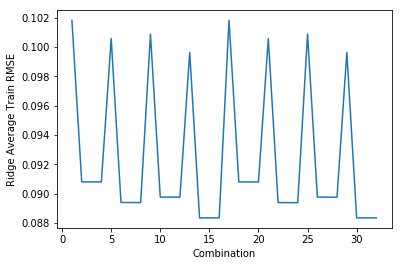

In [47]:
plt.plot(d, rmse_train_com)
plt.xlabel('Combination')
plt.ylabel('Ridge Average Train RMSE')
plt.savefig('plots/2av_AverageTrainRMSE_Ridge.png')
plt.show()

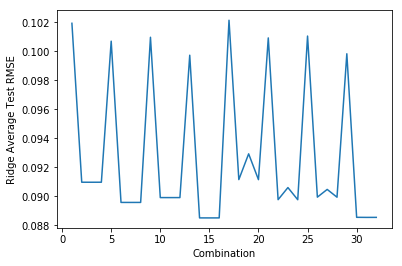

In [48]:
plt.plot(d, rmse_test_com)
plt.xlabel('Combination')
plt.ylabel('Ridge Average Test RMSE')
plt.savefig('plots/2av_AverageTestRMSEpng')
plt.show()

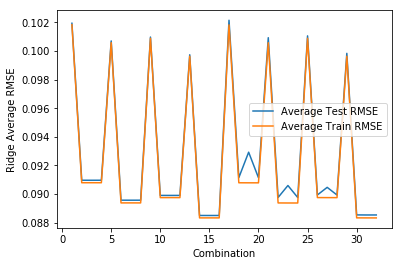

In [49]:
plt.plot(d, rmse_test_com)
plt.plot(d, rmse_train_com)
plt.xlabel('Combination')
plt.ylabel('Ridge Average RMSE')
plt.legend(['Average Test RMSE','Average Train RMSE'])
plt.savefig('plots/2av_AverageTrainTestRMSE.png')
plt.show()

best alpha for comination is :
1.0
kf fold starts
0.208666887483
kf fold starts
0.205994286715
kf fold starts
0.208113038024
kf fold starts
0.206077184809
kf fold starts
0.207954444559
kf fold starts
0.206212690367
kf fold starts
0.208262647125
kf fold starts
0.205641937116
kf fold starts
0.208114669002
kf fold starts
0.206431823965
 Train RMSE : 0.0883361773993
 Test RMSE : 0.0885053989167


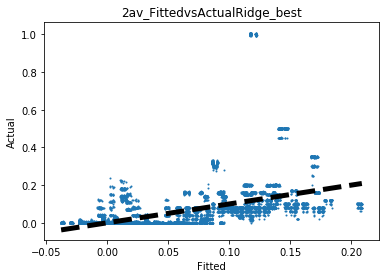

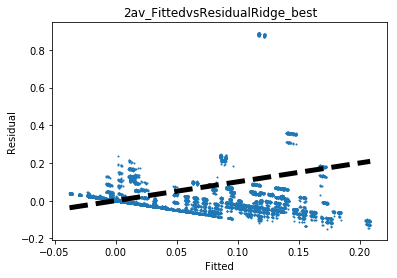

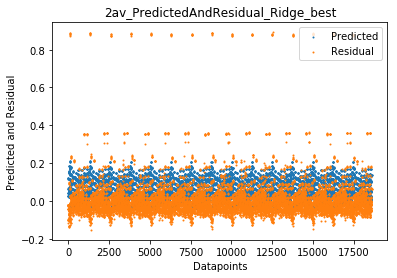

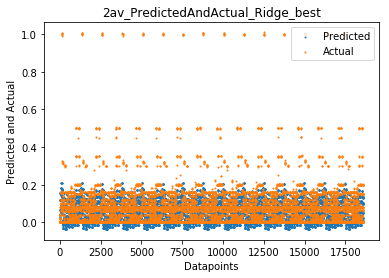

In [52]:
#getting plots for the best model 
# best model obatined was "S,O,O,O,O"

#Task 2 a v, with Ridge Regularization
#Here we first find the best value of alpha by doing RidgeCV, and then apply Ridge function to get the TestRMSE for the same
#By using Regularization,  we will control ill-conditioning and over-fitting
#This is done by applying Ridge,LAsso,Elastic Net regularizations and analyzing again

#First doing for all scalar
from sklearn import linear_model
ridge_reg = linear_model.RidgeCV( cv=10)
rmse_train=[]
rmse_test=[]
actual=[]
res=[]
datapoints=[]
y_predicted_fold=[]

ohenc = OneHotEncoder(categorical_features=(False, True, True, True, True))
ohenc.fit(X_SEnc)
xoh=ohenc.transform(X_SEnc)

ridge_reg.fit(xoh, y, sample_weight=None)
print "best alpha for comination is :"
print ridge_reg.alpha_

ridge_reg_2 = linear_model.Ridge()
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"
    datapoints.append(test_index)
    X_train, y_train = xoh.toarray()[train_index], y[train_index]
    X_test, y_test = xoh.toarray()[test_index], y[test_index]
    actual.append(y_test)
    ridge_reg_2.fit(X_train, y_train)
    y_test_predicted = ridge_reg_2.predict(X_test)
    print max(y_test_predicted)
    
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=ridge_reg_2.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    rmse_test.append(test_curr)
    rmse_train.append(train_curr)
    
    res.append(y_test-y_test_predicted)
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted=np.concatenate(y_predicted_fold).ravel()
datapoints=np.concatenate(datapoints, axis=0)
y_residual=np.concatenate(res, axis=0)
actual=np.concatenate(actual, axis=0)
plot_val(y_predicted,actual,'Fitted','Actual','2av_FittedvsActualRidge_best')
plot_val( y_predicted,y_residual, 'Fitted','Residual','2av_FittedvsResidualRidge_best')  
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2av_PredictedAndResidual_Ridge_best')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2av_PredictedAndActual_Ridge_best')


In [55]:
print ridge_reg_2.coef_
print ridge_reg_2.intercept_
len(ridge_reg_2.coef_)

[ -5.65786638e-03   3.93105678e-02   3.35944519e-03   1.53233134e-03
  -5.53405294e-03  -1.27374487e-02  -2.02729763e-02  -2.02938615e-02
  -2.09898959e-02   7.13125696e-03   3.40794074e-02  -2.29793178e-03
   2.37102481e-03   3.33043364e-02  -1.06483035e-02  -3.49962647e-02
  -4.88071021e-02   6.11473339e-02   4.91359108e-03   6.25170668e-03
  -2.07765351e-03  -1.80481493e-03  -6.66956384e-03  -5.88912570e-03
  -5.82019800e-03  -6.78543129e-03  -4.36977103e-03  -5.46217486e-03
  -8.24109459e-03  -7.87040387e-03   5.61405676e-03  -7.97113273e-03
  -8.27146966e-03  -8.36674402e-03  -8.08625722e-03   1.01096661e-02
   1.07768842e-02   1.09082688e-02   9.44054867e-03   1.01856321e-02
   9.72633415e-03   5.74707639e-03   5.18898973e-03   5.58891575e-03
  -1.31861703e-03  -1.84621357e-03  -1.73467569e-03  -1.86632877e-03
   1.16734867e-05]
0.060822817201


49

In [56]:
#applying lasso for the very first combination
from sklearn import linear_model
lasso_reg = linear_model.LassoCV( cv=10,random_state=27)
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
ohenc_best = OneHotEncoder(categorical_features= (False, False, False, False, False))
ohenc_best.fit(X_SEnc)
xoh=ohenc_best.transform(X_SEnc)
rmse_train_com=[]
rmse_test_com=[]
lasso_reg.fit(xoh, y)
print "best alpha for comination is :"
print lasso_reg.alpha_
#lasso_reg.cv_values_
#best alpha for lasso=0.1
lasso_reg_2 = linear_model.Lasso(alpha=lasso_reg.alpha_, random_state=27)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh[train_index], y[train_index]
    X_test, y_test = xoh[test_index], y[test_index]
    lasso_reg_2.fit(X_train, y_train)
    y_test_predicted = lasso_reg_2.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=lasso_reg_2.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    rmse_test.append(test_curr)
    rmse_train.append(train_curr)
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted_fold=np.concatenate(y_predicted_fold,axis=0)
y_residual=y-y_predicted_fold
rmse_train_com.append(average_train_RMSE)
rmse_test_com.append(average_test_RMSE)

best alpha for comination is :
0.000396781601178
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101835251445
 Test RMSE : 0.101938216381


In [57]:
#lasso reg , continued for 31 remaining combinations

from sklearn.preprocessing import OneHotEncoder
alphalist=[]
lasso_reg=linear_model.LassoCV(cv=10, random_state=27)

for i in l[1:]:
    print i
    rmse_train=[]
    rmse_test=[]
    y_predicted_fold=[]
    ohenc = OneHotEncoder(categorical_features=i)
    ohenc.fit(X_SEnc)
    xoh=ohenc.transform(X_SEnc)
    lasso_reg.fit(xoh, y)
    #print "best alpha for comination "+str(i)+" is :"
    print lasso_reg.alpha_
    alphalist.append(lasso_reg.alpha_)
    lasso_reg_2 = linear_model.Lasso(alpha=lasso_reg.alpha_, random_state=27)
    for train_index, test_index in kf.split(xoh):
        print "kf fold starts"

        X_train, y_train = xoh.toarray()[train_index], y[train_index]
        X_test, y_test = xoh.toarray()[test_index], y[test_index]
        lasso_reg_2.fit(X_train, y_train)
        y_test_predicted =lasso_reg_2 .predict(X_test)
        y_predicted_fold.append(y_test_predicted)
        y_train_predicted=lasso_reg_2.predict(X_train)
        train_curr=mean_squared_error(y_train,y_train_predicted)
        test_curr=mean_squared_error(y_test,y_test_predicted)
        rmse_test.append(test_curr)
        rmse_train.append(train_curr)
    average_train_RMSE=np.sqrt(sum(rmse_train)/10)
    average_test_RMSE=np.sqrt(sum(rmse_test)/10)
    print " Train RMSE : "+ str(average_train_RMSE)
    print " Test RMSE : "+ str(average_test_RMSE)
    rmse_test_com.append(average_test_RMSE)
    rmse_train_com.append(average_train_RMSE)
    y_predicted_fold=np.concatenate(y_predicted_fold).ravel()
    y_residual=y-y_predicted_fold
    count=count+1
print "The minimum test RMSE obatined was for :"
print min(rmse_test_com)


print alphalist
print rmse_train_com
print rmse_test_com




(False, False, False, False, True)
2.25371698678e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.090795448665
 Test RMSE : 0.0909698402492
(False, False, False, True, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907974113266
 Test RMSE : 0.0909686666162
(False, False, False, True, True)
5.20637854674e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907951829268
 Test RMSE : 0.0909670458448
(False, False, True, False, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE :

C:\Users\ektam\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5.65357028874e-06
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883363338534
 Test RMSE : 0.0885055193435
(False, True, True, True, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883483039934
 Test RMSE : 0.0885141757525
(False, True, True, True, True)
2.25183926814e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.088337177275
 Test RMSE : 0.088504505946
(True, False, False, False, False)
0.00022705302024
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101834885096
 Test RMSE : 0.1019347164

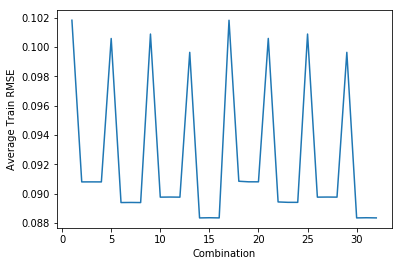

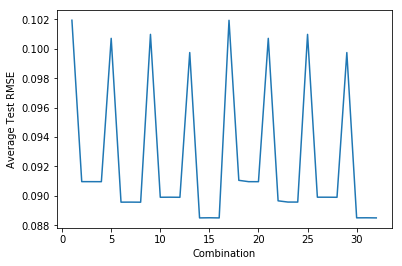

In [58]:


plt.plot(d, rmse_train_com)
plt.xlabel('Combination')
plt.ylabel('Average Train RMSE')
plt.savefig('plots/2av_AverageTrainRMSE_Lasso.png')
plt.show()

plt.plot(d, rmse_test_com)
plt.xlabel('Combination')
plt.ylabel('Average Test RMSE')
plt.savefig('plots/2av_AverageTrainRMSELasso.png')
plt.show()




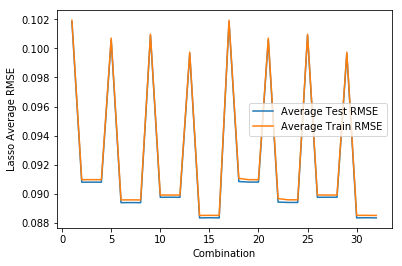

In [60]:
plt.plot(d, rmse_train_com)
plt.plot(d, rmse_test_com)
plt.xlabel('Combination')
plt.ylabel('Lasso Average RMSE')
plt.legend(['Average Test RMSE','Average Train RMSE'])
plt.savefig('plots/2av_AverageTrainTestRMSE_LAsso.png')
plt.show()

2.25183926814e-05
kf fold starts
0.207823115256
kf fold starts
0.205092346879
kf fold starts
0.207203381036
kf fold starts
0.205267631606
kf fold starts
0.207039697568
kf fold starts
0.205306339024
kf fold starts
0.207344946886
kf fold starts
0.204994111643
kf fold starts
0.207273892654
kf fold starts
0.205509003744
 Train RMSE : 0.088337177275
 Test RMSE : 0.088504505946


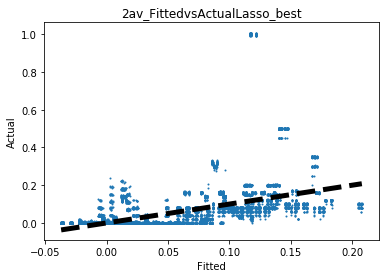

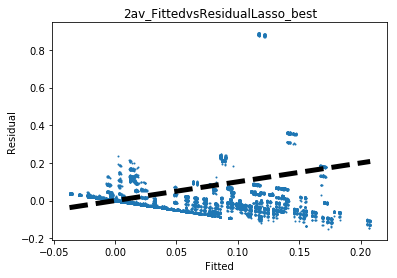

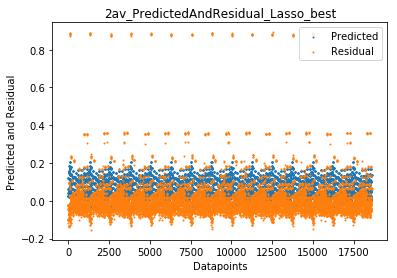

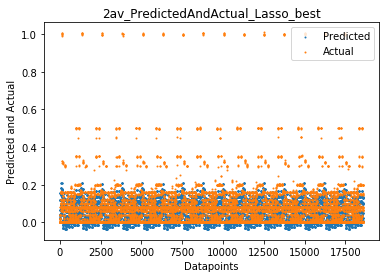

In [76]:
#getting plots for the best model 
# best model obatined was "S,O,O,O,O"

#First doing for all scalar
from sklearn import linear_model

rmse_train=[]
rmse_test=[]
actual=[]
res=[]
datapoints=[]
y_predicted_fold=[]
ohenc = OneHotEncoder(categorical_features=(False, True, True, True, True))
ohenc.fit(X_SEnc)
xoh=ohenc.transform(X_SEnc)
lasso_reg.fit(xoh, y)
#print "best alpha for comination "+str(i)+" is :"
print lasso_reg.alpha_
alphalist.append(lasso_reg.alpha_)
lasso_reg_2 = linear_model.Lasso(alpha=lasso_reg.alpha_, random_state=27)


for train_index, test_index in kf.split(xoh):
    print "kf fold starts"
    datapoints.append(test_index)
    X_train, y_train = xoh.toarray()[train_index], y[train_index]
    X_test, y_test = xoh.toarray()[test_index], y[test_index]
    actual.append(y_test)
    lasso_reg_2.fit(X_train, y_train)
    y_test_predicted = lasso_reg_2.predict(X_test)
    print max(y_test_predicted)
    
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=lasso_reg_2.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    rmse_test.append(test_curr)
    rmse_train.append(train_curr)
    
    res.append(y_test-y_test_predicted)
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted=np.concatenate(y_predicted_fold).ravel()
datapoints=np.concatenate(datapoints, axis=0)
y_residual=np.concatenate(res, axis=0)
actual=np.concatenate(actual, axis=0)

plot_val(y_predicted,actual,'Fitted','Actual','2av_FittedvsActualLasso_best')
plot_val( y_predicted,y_residual, 'Fitted','Residual','2av_FittedvsResidualLasso_best') 
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2av_PredictedAndResidual_Lasso_best')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2av_PredictedAndActual_Lasso_best')


In [77]:
print lasso_reg_2.coef_
print lasso_reg_2.sparse_coef_
print lasso_reg_2.intercept_
len(lasso_reg_2.coef_)

[ -0.00000000e+00   4.46960264e-02   8.71779277e-03   6.88989331e-03
  -0.00000000e+00  -7.05747499e-03  -1.46124616e-02  -2.24073979e-02
  -2.30949240e-02   4.76296089e-03   3.17195136e-02  -4.39765612e-03
   6.14050281e-07   5.11471951e-02  -0.00000000e+00  -2.83157327e-02
  -4.44288559e-02   8.36131846e-02  -0.00000000e+00   1.61756961e-04
  -0.00000000e+00  -0.00000000e+00  -2.76197154e-04  -0.00000000e+00
  -0.00000000e+00  -3.90057020e-04   6.88039758e-04   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   8.20539460e-05   2.13676966e-04  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   9.32854654e-06]
  (0, 1)	0.0446960263513
  (0, 2)	0.00871779277085
  (0, 3)	0.00688989331153
  (0, 5)	-0.00705747498968
  (0, 6)	-0.0146124615961
  (0, 7)	-0.02240739793

49

In [70]:
#Task 2 a v )applying ElasticNetRegularization for the very first combination
from sklearn import linear_model
en_reg=linear_model.ElasticNetCV(cv=10, random_state=27)
#rmse_test_com=[]
#rmse_train_com=[]
rmse_train=[]
rmse_test=[]
rmse_train_com=[]
rmse_test_com=[]
y_predicted_fold=[]
lambda1list=[]
lambda2list=[]
ohenc_best = OneHotEncoder(categorical_features= (False, False,False, False,False, ))
ohenc_best.fit(X_SEnc)
xoh=ohenc_best.transform(X_SEnc)

en_reg.fit(xoh, y)
print "best alpha for comination is :"
print en_reg.alpha_
lambda1=en_reg.alpha_*en_reg.l1_ratio_
lambda2=0.5*en_reg.alpha_*(1 - en_reg.l1_ratio_)
print "lambda1: "+str(lambda1)
print "lambda2: "+str(lambda2)
lambda1list.append(lambda1)
lambda2list.append(lambda2)
#en_reg.cv_values_
#best alpha for en=0.1
en_reg_2 = linear_model.ElasticNet(alpha=en_reg.alpha_, random_state=27)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh[train_index], y[train_index]
    X_test, y_test = xoh[test_index], y[test_index]
    en_reg_2.fit(X_train, y_train)
    y_test_predicted = en_reg_2.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=en_reg_2.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    rmse_test.append(test_curr)
    rmse_train.append(train_curr)
average_train_RMSE=np.sqrt(sum(rmse_train)/10)
average_test_RMSE=np.sqrt(sum(rmse_test)/10)
rmse_test_com.append(average_test_RMSE)
rmse_train_com.append(average_train_RMSE)

print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted_fold=np.concatenate(y_predicted_fold,axis=0)
y_residual=y-y_predicted_fold


best alpha for comination is :
0.000793563202355
lambda1: 0.000396781601178
lambda2: 0.000198390800589
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101835257814
 Test RMSE : 0.10193820425


In [71]:
#en reg , continued for 31 remaining combinations

from sklearn.preprocessing import OneHotEncoder
alphalist=[]
lambda1list=[]
lambda2list=[]
en_reg=linear_model.ElasticNetCV(cv=10, random_state=27)
en_reg.fit(xoh, y)
en_reg.alpha_
for i in l[1:]:
    print i
    rmse_train=[]
    rmse_test=[]
    y_predicted_fold=[]
    ohenc = OneHotEncoder(categorical_features=i)
    ohenc.fit(X_SEnc)
    xoh=ohenc.transform(X_SEnc)
    en_reg.fit(xoh, y)
    print "best alpha for comination "+str(i)+" is :"
    print en_reg.alpha_
    lambda1=en_reg.alpha_*en_reg.l1_ratio_
    lambda2=0.5*en_reg.alpha_*(1 - en_reg.l1_ratio_)
    print "lambda1: "+str(lambda1)
    print "lambda2: "+str(lambda2)
    lambda1list.append(lambda1)
    lambda2list.append(lambda2)
    alphalist.append(en_reg.alpha_)
    en_reg_2 = linear_model.ElasticNet(alpha=en_reg.alpha_, random_state=27)
    for train_index, test_index in kf.split(xoh):
        print "kf fold starts"
        X_train, y_train = xoh.toarray()[train_index], y[train_index]
        X_test, y_test = xoh.toarray()[test_index], y[test_index]
        en_reg_2.fit(X_train, y_train)
        y_test_predicted =en_reg_2 .predict(X_test)
        y_predicted_fold.append(y_test_predicted)
        y_train_predicted=en_reg_2.predict(X_train)
        train_curr=mean_squared_error(y_train,y_train_predicted)
        test_curr=mean_squared_error(y_test,y_test_predicted)
        rmse_test.append(test_curr)
        rmse_train.append(train_curr)
    average_train_RMSE=np.sqrt(sum(rmse_train)/10)
    average_test_RMSE=np.sqrt(sum(rmse_test)/10)
    print " Train RMSE : "+ str(average_train_RMSE)
    print " Test RMSE : "+ str(average_test_RMSE)
    rmse_test_com.append(average_test_RMSE)
    rmse_train_com.append(average_train_RMSE)

    y_predicted_fold=np.concatenate(y_predicted_fold).ravel()
    y_residual=y-y_predicted_fold
    count=count+1
print "The minimum test RMSE obatined was for :"
print min(rmse_test_com)

print alphalist
print lambda1list
print lambda2list
print rmse_train_com
print rmse_test_com



(False, False, False, False, True)
best alpha for comination (False, False, False, False, True) is :
4.50743397356e-05
lambda1: 2.25371698678e-05
lambda2: 1.12685849339e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907957668025
 Test RMSE : 0.0909700650953
(False, False, False, True, False)
best alpha for comination (False, False, False, True, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907976565807
 Test RMSE : 0.0909685811951
(False, False, False, True, True)
best alpha for comination (False, False, False, True, True) is :
0.000104127570935
lambda1: 5.20637854674e-05
lambda2: 2.60318927337e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fo

kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0894011323648
 Test RMSE : 0.0895826153624
(True, False, True, True, True)
best alpha for comination (True, False, True, True, True) is :
0.00042036480096
lambda1: 0.00021018240048
lambda2: 0.00010509120024
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0894000605555
 Test RMSE : 0.0895816891118
(True, True, False, False, False)
best alpha for comination (True, True, False, False, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.10089254624
 Test RMSE : 0.100977179515
(True, True, False, False, True)
best alpha for comination (True, True, False, False, True) is :
4.22126457392e-05
lambda1: 2.11063

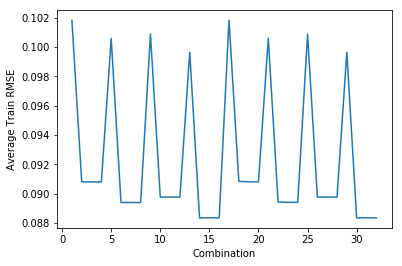

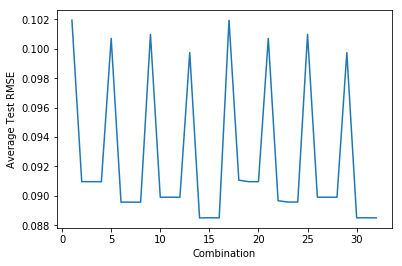

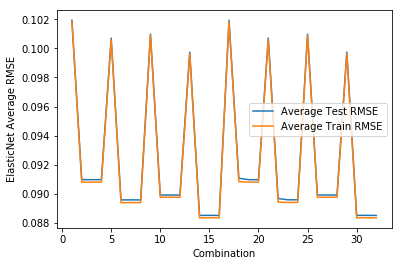

In [72]:


plt.plot(d, rmse_train_com)
plt.xlabel('Combination')
plt.ylabel('Average Train RMSE')
plt.savefig('plots/2av_AverageTrainRMSE_ENet.png')
plt.show()

plt.plot(d, rmse_test_com)
plt.xlabel('Combination')
plt.ylabel('Average Test RMSE')
plt.savefig('plots/2av_AverageTrainRMSE_ENet.png')
plt.show()

plt.plot(d, rmse_test_com)
plt.plot(d, rmse_train_com)
plt.xlabel('Combination')
plt.ylabel('ElasticNet Average RMSE')
plt.legend(['Average Test RMSE','Average Train RMSE'])
plt.savefig('plots/2av_AverageTrainTestRMSE_EN.png')
plt.show()

kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.00780347461727
 Test RMSE : 0.00783304291693


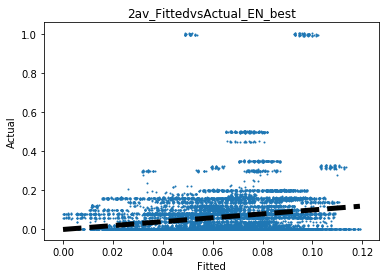

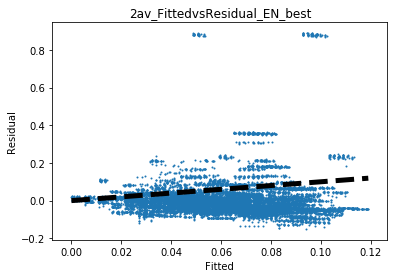

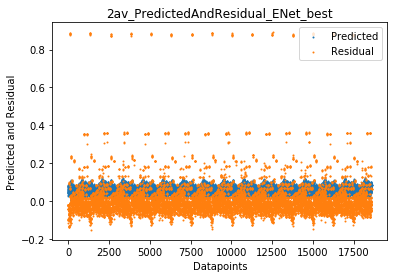

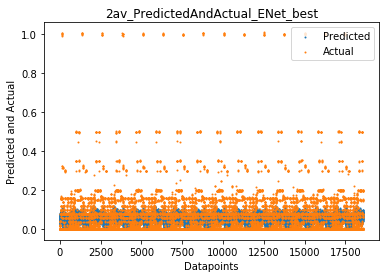

In [73]:
#Task 2 a v )applying ElasticNetRegularization for the very best combination
from sklearn import linear_model


rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
ohenc_best = OneHotEncoder(categorical_features= (False, True, True, True, True))
ohenc_best.fit(X_SEnc)
xoh=ohenc_best.transform(X_SEnc)


en_reg_2 = linear_model.ElasticNet(alpha=0.0000482915, random_state=27)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh.toarray()[train_index], y[train_index]
    X_test, y_test = xoh.toarray()[test_index], y[test_index]
    en_reg_2.fit(X_train, y_train)
    y_test_predicted = en_reg_2.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=en_reg_2.predict(X_train)
    train_curr=mean_squared_error(y_train,y_train_predicted)
    test_curr=mean_squared_error(y_test,y_test_predicted)
    rmse_test.append(test_curr)
    rmse_train.append(train_curr)
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10

print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted_fold=np.concatenate(y_predicted_fold,axis=0)
y_residual=y-y_predicted_fold
plot_val(y_predicted,actual,'Fitted','Actual','2av_FittedvsActual_EN_best')
plot_val( y_predicted,y_residual, 'Fitted','Residual','2av_FittedvsResidual_EN_best') 
plot_d(datapoints,y_predicted,y_residual,'Datapoints','Predicted','Residual','2av_PredictedAndResidual_ENet_best')
plot_d(datapoints,y_predicted,actual,'Datapoints','Predicted','Actual','2av_PredictedAndActual_ENet_best')



In [74]:
print en_reg_2.coef_
print en_reg_2.intercept_
len(en_reg_2.coef_)

[ -0.00000000e+00   4.46692751e-02   8.69571658e-03   6.86813122e-03
  -0.00000000e+00  -7.05289924e-03  -1.46081745e-02  -2.22281895e-02
  -2.29144259e-02   4.91945354e-03   3.18722320e-02  -4.22000868e-03
   1.58197931e-04   5.11306007e-02  -0.00000000e+00  -2.83190377e-02
  -4.44247717e-02   8.36013180e-02  -0.00000000e+00   1.20439388e-04
  -0.00000000e+00  -0.00000000e+00  -2.33487147e-04  -0.00000000e+00
  -0.00000000e+00  -3.47122376e-04   6.33280909e-04   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   3.67249911e-05   1.68256419e-04  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   9.15242651e-06]
0.0449875528808


49